> Mamy serię pojemników z wodą, połączonych (każdy z każdym) rurami. Pojemniki maja kształty prostokątów, rury nie maja objetosci (powierzchni). Każdy pojemnik opisany jest przez współrzędne lewego górnego rogu i prawego dolnego rogu. Wiemy, ze do pojemników nalano A “powierzchni” wody (oczywiście woda rurami spłynęła do najniźszych pojemników). Proszę zaproponować algorytm Obliczający ile pojemników zostało w pełni zalanych.

### Implementacja algorytmu

In [1]:
def sorted_containers(containers):
    temp_arr = [None] * len(containers)
    step = 1

    while step < len(containers):
        for left_idx in range(0, len(containers)-step, 2 * step):
            mid_idx = left_idx + step
            right_idx = mid_idx + step

            if right_idx > len(containers): right_idx = len(containers)

            # Perform merging
            i = left_idx
            j = mid_idx
            k = left_idx

            while i < mid_idx and j < right_idx:
                # A container is represented by a tuple of left-top and right_bottom coordinates
                # container -> ((x1, y1), (x2, y2))
                #                  |         |
                #               left-top  right_bottom

                # Sort containers to be in the order they will be filled completely
                # At first, sort containers by their top position (if top side is lower, a container will be filled
                # completely earlier), and then, if there are at least 2 containers that end on the same height,
                # put the one that stats earlier before the other ones.
                if containers[i][0][1] < containers[j][0][1]\
                    or (containers[i][0][1] == containers[j][0][1] and containers[i][1][1] < containers[j][1][1]):
                    temp_arr[k] = containers[i]
                    i += 1
                else:
                    temp_arr[k] = containers[j]
                    j += 1
                k += 1

            # Rewrite the remaining values
            for i in range(i, mid_idx):
                temp_arr[k] = containers[i]
                k += 1

            for j in range(j, right_idx):
                temp_arr[k] = containers[j]
                k += 1

        # If there are still some values remaining, rewrite them
        for k in range(k, len(containers)):
            temp_arr[k] = containers[k]

        # Swap arrays
        containers, temp_arr = temp_arr, containers
        step *= 2

    return containers


# Containers must be sorted by their bottom side's y coordinate
def capacity_and_full_containers(containers, max_y: 'a limit height (container\'s top) coordinate'):
	total_capacity = 0
	full_containers = 0
	# We check all the containers below a current container's bottom coordinate
	for curr in containers:
		# If a container's bottom is not below the max_y, break the loop
		if curr[1][1] >= max_y:
			continue
		# If a container's top coordinate is not above the max_y, it can be filled completely
		if curr[0][1] <= max_y:
			curr_height = curr[0][1] - curr[1][1]
			full_containers += 1
		else:
			curr_height = max_y - curr[1][1]
		curr_width = curr[1][0] - curr[0][0]
		curr_capacity = curr_height * curr_width
		total_capacity += curr_capacity
	return total_capacity, full_containers


def fully_filled_containers(containers, water_area):
	if water_area <= 0: return 0
    # Sort a containers list
	containers = sorted_containers(containers)
	# Use a binary search algorithm to find a number of containers:
	i = 0
	j = len(containers) - 1
	while i <= j:
		mid_idx = (i + j) // 2
		curr_top = containers[mid_idx][0][1]
		required_water, filled_containers = capacity_and_full_containers(containers, curr_top)
# 		print(f"i {i}, j {j}, mid {mid_idx}, max_y {curr_top}, water {required_water}, filled cont. {filled_containers}")
		if water_area >= required_water:
			i = mid_idx + 1
		else:
			j = mid_idx - 1

	# Store fully filled containers count to be returned
	if j >= 0:
		_, filled_containers = capacity_and_full_containers(containers, containers[j][0][1])
	else:
		filled_containers = 0
	return filled_containers

###### Kilka testów
(Testy przeprowadzone na podstawie poniższego rysunku):
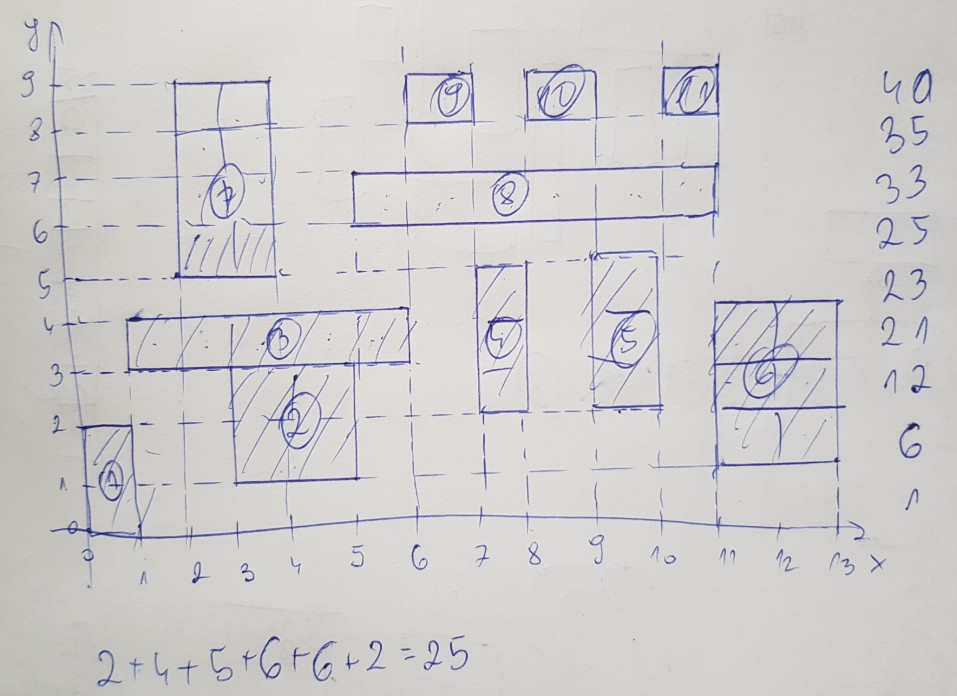

In [2]:
import random
from pprint import pprint as pp

containers = [
    ((0, 2), (1, 0)),
    ((3, 3), (5, 1)),
    ((1, 4), (6, 3)),
    ((7, 5), (8, 2)),
    ((9, 5), (10, 2)),
    ((11, 4), (13, 1)),
    ((2, 9), (4, 5)),
    ((5, 7), (11, 6)),
    ((6, 9), (7, 8)),
    ((8, 9), (9, 8)),
    ((10, 9), (11, 8))
]

random.shuffle(containers)

print(fully_filled_containers(containers, 21.95))

for i in range(10):
    print()
    capacity, filled_count = capacity_and_full_containers(containers, i)
    print(capacity, filled_count)
    print(fully_filled_containers(containers, capacity))

4

0 0
0

1 0
0

6 1
1

12 2
2

21 4
4

23 6
6

25 6
6

33 7
7

35 7
7

40 11
11
